In [205]:
%pip install kagglehub[pandas-datasets]

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Eksplorasi Dataset

In [207]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "insurance.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mirichoi0218/insurance",
  file_path,
)
df.head()

/tmp/ipython-input-1532120452.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'insurance' dataset.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [208]:
insurance_df=df

In [209]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [210]:
insurance_df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [211]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [212]:
insurance_df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [213]:
def histogram_plot(name, df):
    plt.figure(figsize=(10,6))
    plt.hist(df, bins=30, alpha=0.7)
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.title(f'histogram of {name}')
    plt.show()

def barplot(name_x, name_y, x, y):
    plt.figure(figsize=(10,6))
    sns.barplot(x=x, y=y, errorbar=None)
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    plt.title(f'barplot of {name_x} vs {name_y}')
    plt.show()

def scatter_plot(name_x, name_y, x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, label='Data')
    
    x = np.array(x)
    y = np.array(y)
    
    slope, intercept = np.polyfit(x, y, 1)  
    y_pred = slope * x + intercept
    
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
    
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    plt.title(f'Scatter plot of {name_x} vs {name_y}')
    plt.legend()
    plt.show()
    
    print(f"Regression line: {name_y} = {intercept:.2f} + {slope:.2f} * {name_x}")

In [214]:
insurance_df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


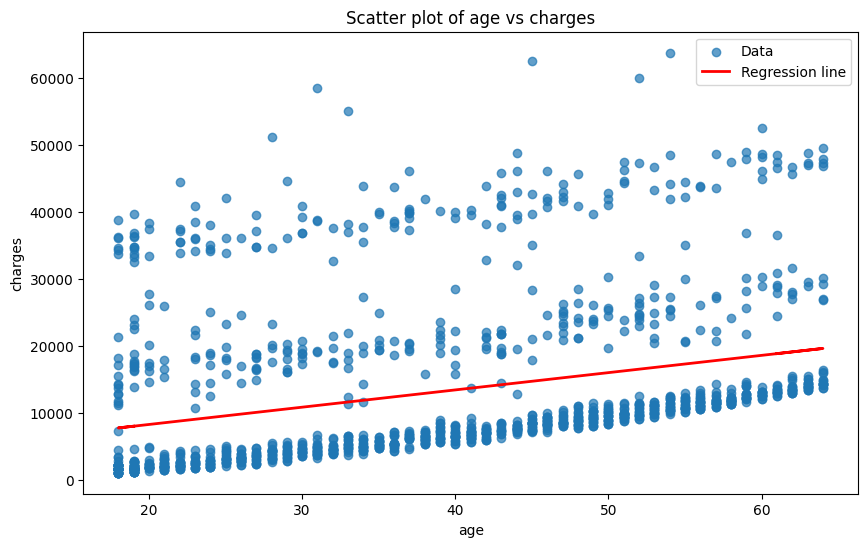

Regression line: charges = 3165.89 + 257.72 * age


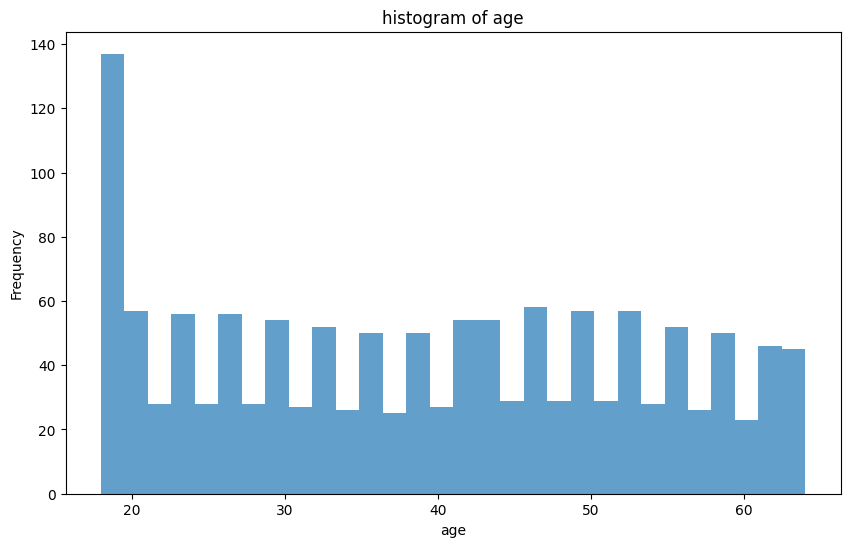

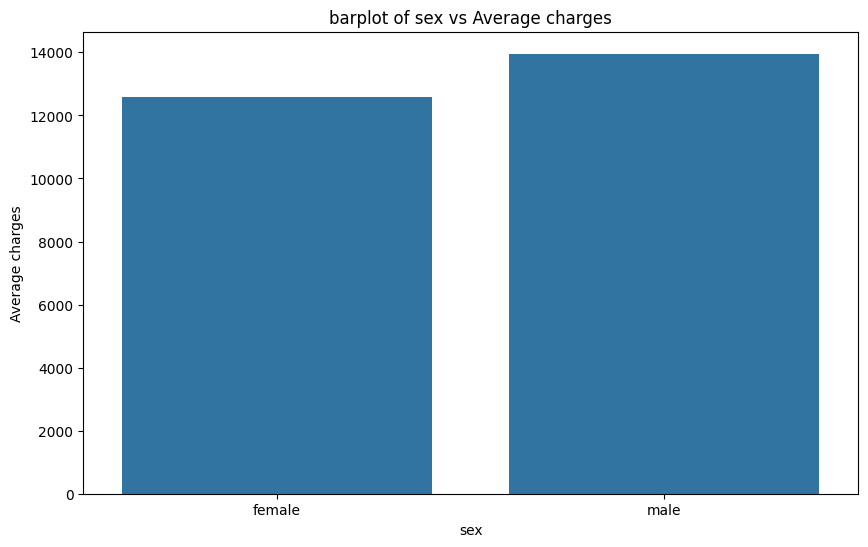

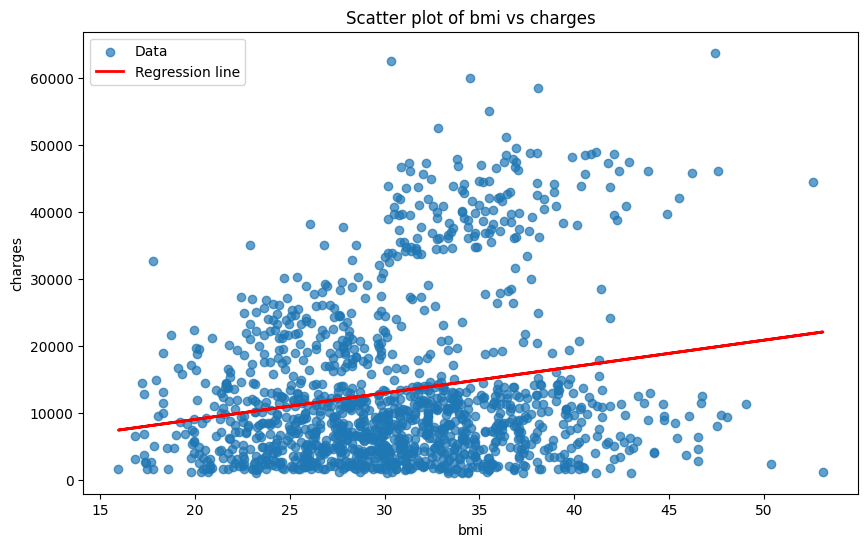

Regression line: charges = 1192.94 + 393.87 * bmi


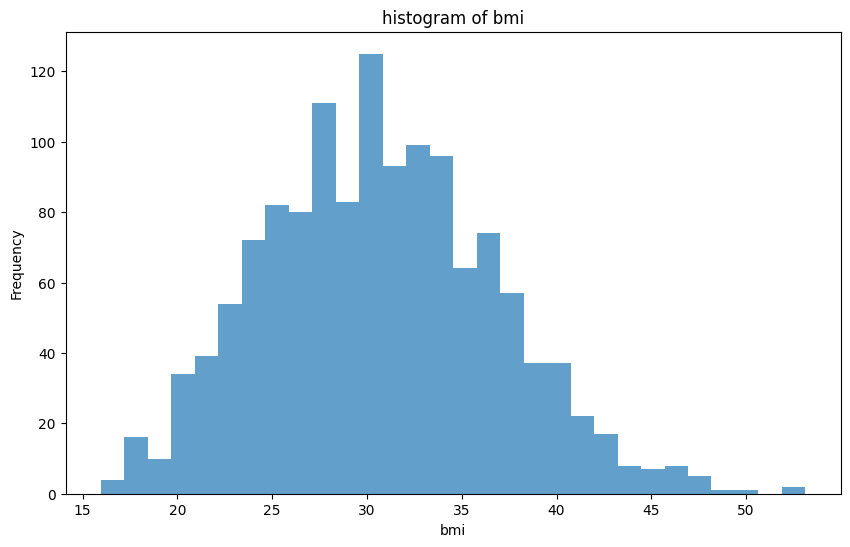

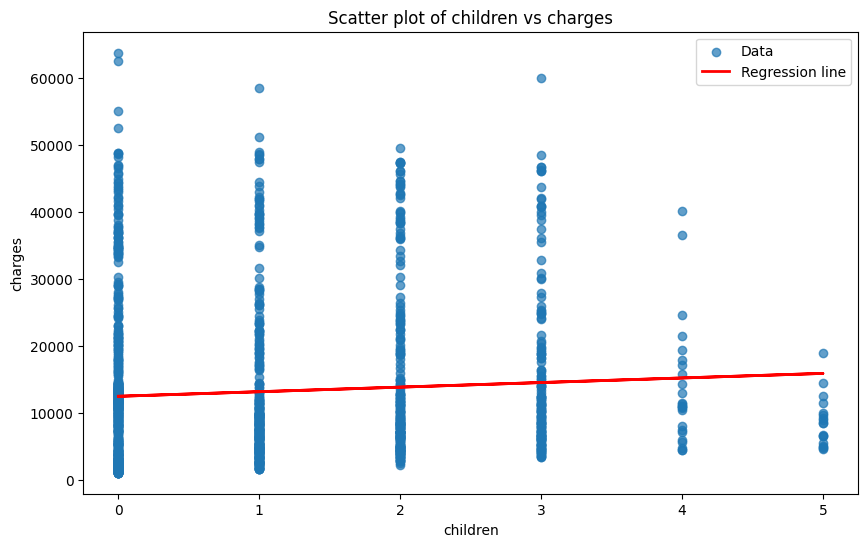

Regression line: charges = 12522.50 + 683.09 * children


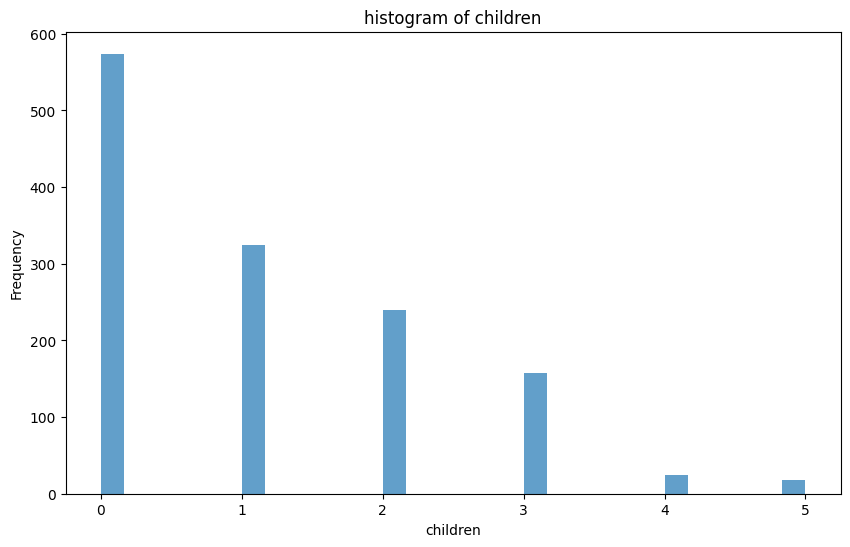

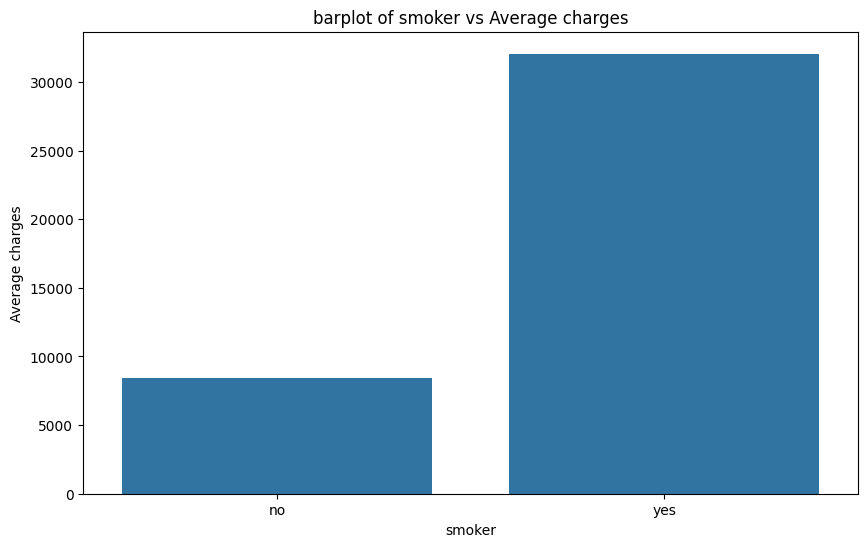

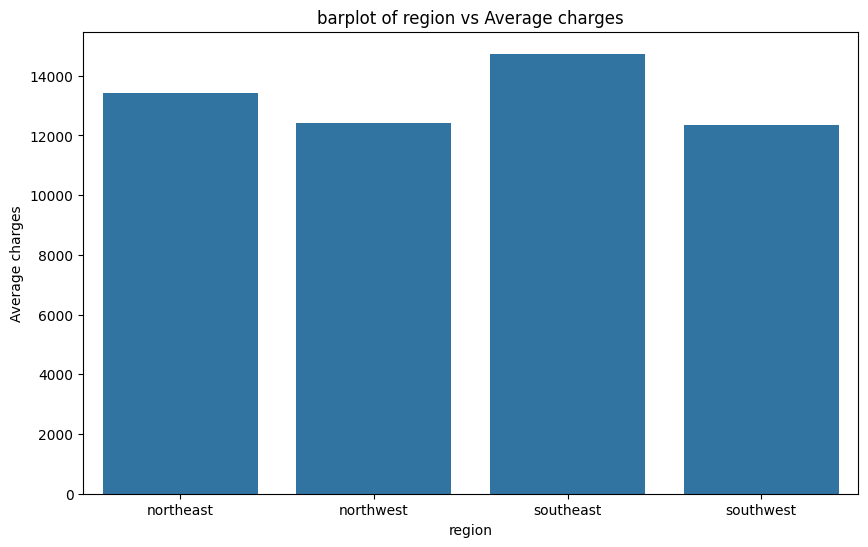

In [215]:
target = 'charges'

for col in insurance_df.columns:
    if col == target:
        continue
        
    if insurance_df[col].dtype in ['int64', 'float64']:
        scatter_plot(col, target, insurance_df[col], insurance_df[target])
        histogram_plot(col, insurance_df[col])
        
    else:
        grouped = insurance_df.groupby(col)[target].mean()
        barplot(col, f'Average {target}', grouped.index, grouped.values)

In [216]:
for col in insurance_df.columns:
    print(f"{col} : {insurance_df[col].nunique()} unique values")
    print('='*30)

age : 47 unique values
sex : 2 unique values
bmi : 548 unique values
children : 6 unique values
smoker : 2 unique values
region : 4 unique values
charges : 1337 unique values


In [217]:
def lableEncoding(arr):
    unique_vals=sorted(set(arr))
    label_map={val:idx for idx, val in enumerate(unique_vals)}
    encoded = [label_map[x] for x in arr]
    return encoded

def hotEncoding(col, prefix=None):
    unique_vals=sorted(set(col))
    data= {}
    for category in unique_vals:
        col_name=f"{prefix}_{category}"
        data[col_name]=[1 if val == category else 0 for val in col]
    return pd.DataFrame(data)

In [218]:
insurance_df['sex']=lableEncoding(insurance_df['sex'])
insurance_df['smoker']=lableEncoding(insurance_df['smoker'])

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [219]:
insurance_df_copy=insurance_df.copy()
insurance_df.drop(columns='region', inplace=True)
insurance_df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [220]:
data=hotEncoding(insurance_df_copy['region'], 'encoded')
selected_cols = ['encoded_northeast', 'encoded_northwest', 'encoded_southeast']
ohe_selected = data[selected_cols]

insurance_df_copy=pd.concat([insurance_df_copy, ohe_selected], axis=1)
insurance_df_copy.drop(columns='region', inplace=True)

insurance_df_copy.head()

,age,sex,bmi,children,smoker,charges,encoded_northeast,encoded_northwest,encoded_southeast
0,19,0,27.900,0,1,16884.92400,0,0,0
1,18,1,33.770,1,0,1725.55230,0,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0
4,32,1,28.880,0,0,3866.85520,0,1,0


In [226]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=insurance_df.drop(columns='charges')
Y=insurance_df['charges']

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [227]:
model = LinearRegression()

model.fit(X_train_scaled, Y_train)

y_pred=model.predict(X_test_scaled)

In [228]:
def mse(y_test, y_pred):
    return sum((yt-yp) ** 2 for yt, yp in zip(y_test, y_pred))/len(y_test)

def rmse(y_test, y_pred):
    return (mse(y_test, y_pred)) ** 0.5

def mae(y_true, y_pred):
    return sum(abs(yt - yp) for yt, yp in zip(y_true, y_pred)) / len(y_true)

def get_mean(arr):
    return sum(arr)/len(arr)


def r2_score(y_true, y_pred):
    ss_residual=sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred))
    ss_total=sum((yt - get_mean(y_true)) ** 2 for yt in y_true)
    if ss_total == 0:
        return 1 if ss_residual == 0 else 0
    return 1 - (ss_residual / ss_total)

def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    if n <= n_features:
        return 0
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)


In [225]:
# 4. Hitung dan tampilkan hasil
n_features = X_train_scaled.shape[1]  # jumlah fitur

print("Mean Squared Error (MSE):", mse(Y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse(Y_test, y_pred))
print("Mean Absolute Error (MAE):", mae(Y_test, y_pred))
print("R² Score:", r2_score(Y_test, y_pred))
print("Adjusted R² Score:", adjusted_r2_score(Y_test, y_pred, n_features))

Mean Squared Error (MSE): 33979257.05080819
Root Mean Squared Error (RMSE): 5829.172930254187
Mean Absolute Error (MAE): 4213.484797807137
R² Score: 0.7811302113434098
Adjusted R² Score: 0.7769533069797343
